# Fetching DataSets

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist  = fetch_openml('mnist_784')

In [3]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
x, y = mnist['data'].to_numpy(), mnist['target'].to_numpy()

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [9]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28,28) 

(-0.5, 27.5, 27.5, -0.5)

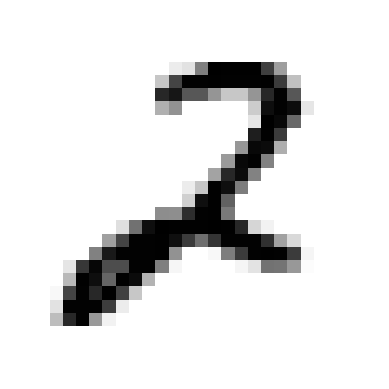

In [10]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

In [11]:
y[36001]

'2'

In [12]:
x_train, x_test = x[:60000], x[60000:]

In [13]:
y_train, y_test = y[:60000], y[60000:]

In [14]:
import numpy as np
# shuffle_index = np.random.permutation(60000)
# x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a 2 Detector

In [15]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [16]:
y_train_2

array([False, False, False, ..., False, False, False])

In [17]:
y_test_2

array([False,  True, False, ..., False, False, False])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression(tol =0.1, solver='lbfgs')

In [20]:
clf.fit(x_train, y_train_2)

C:\Users\91972\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [21]:
clf.predict([some_digit])

array([ True])

In [22]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy')
a

C:\Users\91972\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91972\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

array([0.9769 , 0.97725, 0.98015])

In [23]:
a.mean()

0.9781

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

In [ ]:
y_train_pred

# Calculating Confusion Metrics

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train_2, y_train_pred)

In [ ]:
confusion_matrix(y_train_2, y_train_2)  # for perfect predications

# Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_2, y_train_pred)

In [ ]:
recall_score(y_train_2, y_train_pred)

# F1- Score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_train_2, y_train_pred)

# Precision Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")

In [ ]:
y_scores

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [ ]:
precisions

In [ ]:
recalls

In [ ]:
thresholds

# precisions recalls curve plotting

In [ ]:
plt.plot(thresholds, precisions[:-1], 'b--', label="Precisions")
plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
plt.xlabel('Thresholds')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()